In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('mobile.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1995    False
1996    False
1997    False
1998    False
1999    False
Length: 2000, dtype: bool

# 1. univariate Selection

In [4]:
x=df.drop(labels='price_range',axis=1)
y=df['price_range']

In [5]:
x.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [6]:
y.head()

0    1
1    2
2    2
3    2
4    1
Name: price_range, dtype: int64

In [7]:
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2

#Apply SelectKBest algorithm.

In [9]:
of=SelectKBest(score_func=chi2,k=20)
off=of.fit(x,y)

In [12]:
df_score=pd.DataFrame(off.scores_,columns=["Scores"])
df_columns=pd.DataFrame(x.columns)

In [14]:
feature_rank=pd.concat([df_columns,df_score],axis=1)

In [20]:
feature_rank.columns=(['Features','Score'])

In [21]:
feature_rank

,Features,Score
0,battery_power,14129.866576
1,blue,0.723232
2,clock_speed,0.648366
3,dual_sim,0.631011
4,fc,10.135166
5,four_g,1.521572
6,int_memory,89.839124
7,m_dep,0.745820
8,mobile_wt,95.972863
9,n_cores,9.097556


In [23]:
feature_rank.sort_index(ascending=False)

,Features,Score
19,wifi,0.422091
18,touch_screen,1.928429
17,three_g,0.327643
16,talk_time,13.236400
15,sc_w,16.480319
14,sc_h,9.614878
13,ram,931267.519053
12,px_width,9810.586750
11,px_height,17363.569536
10,pc,9.186054


In [24]:
feature_rank.nlargest(10,'Score')

,Features,Score
13,ram,931267.519053
11,px_height,17363.569536
0,battery_power,14129.866576
12,px_width,9810.586750
8,mobile_wt,95.972863
6,int_memory,89.839124
15,sc_w,16.480319
16,talk_time,13.236400
4,fc,10.135166
14,sc_h,9.614878


# 2. Feature Importance
It gives a score for each feature for your data. The higher the score,more relevent it is.

In [27]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

In [28]:
model=ExtraTreesClassifier()

In [29]:
model.fit(x,y)

ExtraTreesClassifier()

In [30]:
print(model.feature_importances_)

[0.06203133 0.01991122 0.03357477 0.01949446 0.03185858 0.01609543
 0.0346655  0.0329163  0.03574702 0.03269028 0.03228043 0.04750055
 0.0494054  0.39767251 0.03353171 0.03345508 0.03389766 0.01403717
 0.01904809 0.0201865 ]


In [31]:
Rank_features=pd.Series(model.feature_importances_,index=x.columns)

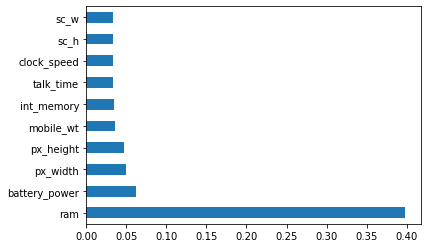

In [36]:
Rank_features.nlargest(10).plot(kind='barh')
plt.show()

# 3. Correlation

In [37]:
import seaborn as sns

In [38]:
corr=df.corr()

<AxesSubplot:>

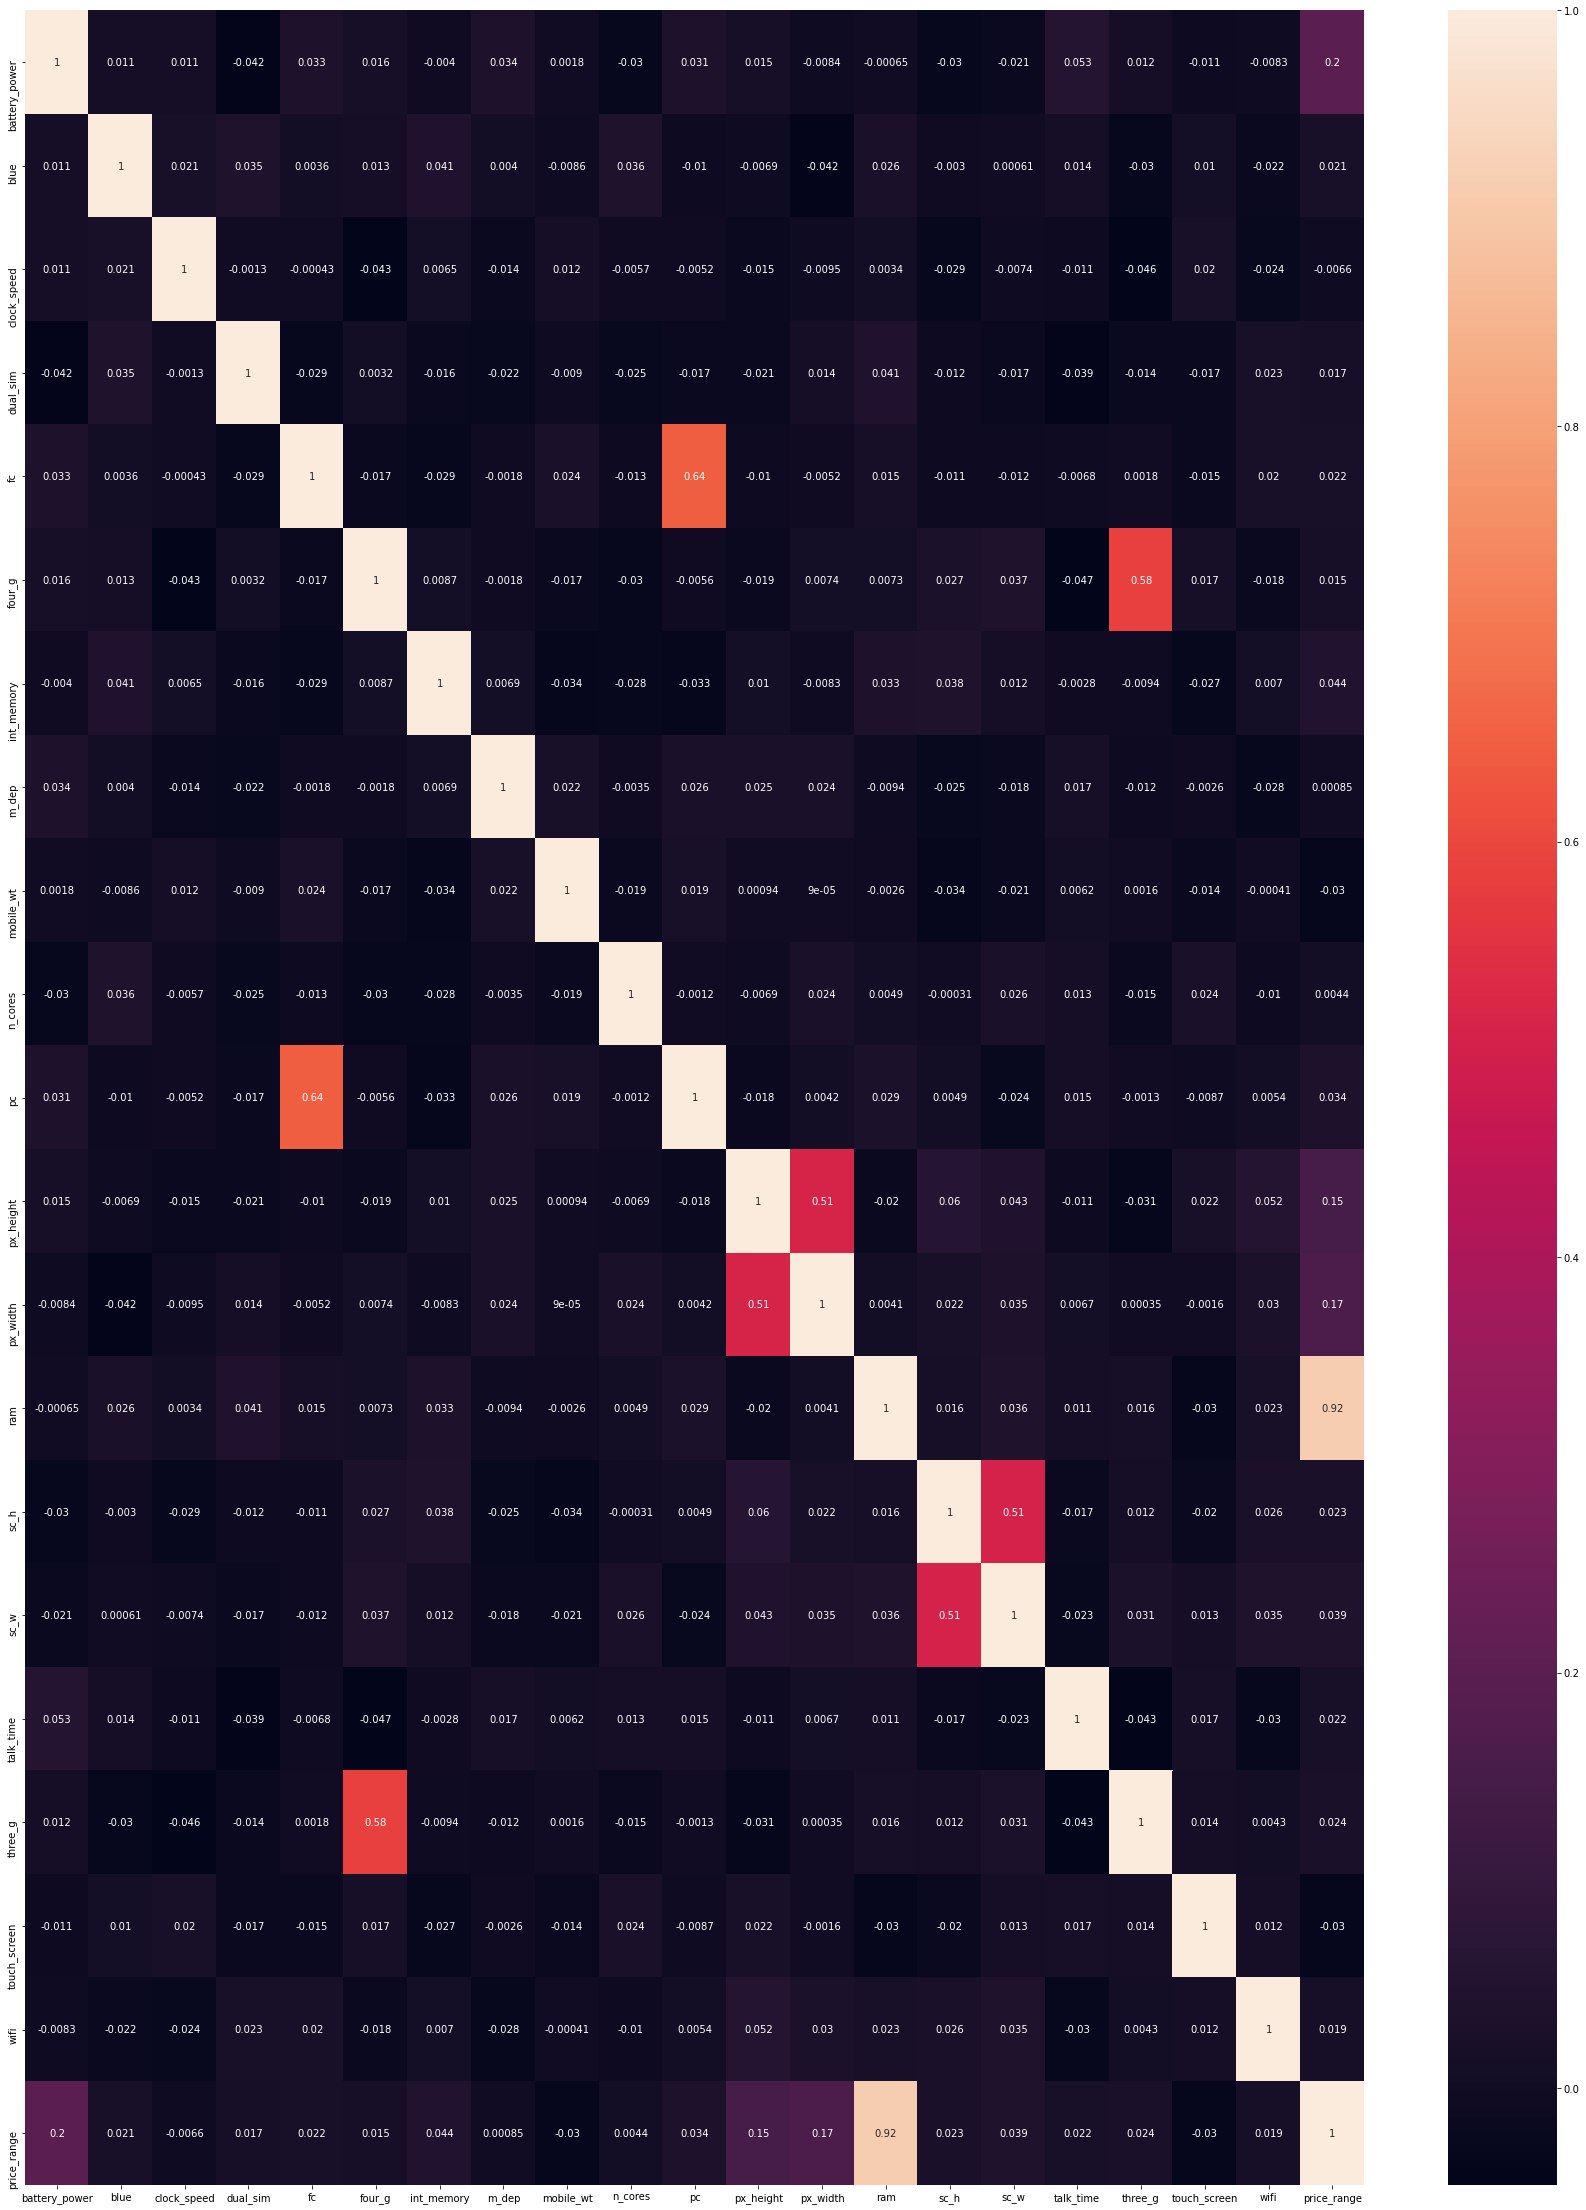

In [42]:
top_feature=corr.index
plt.figure(figsize=(30,40))
sns.heatmap(df[top_feature].corr(),annot=True)

In [48]:
# Remove Correlated
threshold=0.5

In [44]:
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [49]:
correlation(df.iloc[:,:-1],threshold)

{'pc', 'px_width', 'sc_w', 'three_g'}

In [50]:
from sklearn.feature_selection import mutual_info_classif  # mutual_info_classif used to find out highly correlated features

In [55]:
mutual_info=mutual_info_classif(x,y)

In [53]:
mutual_data=pd.Series(mutual_info,index=x.columns)
mutual_data.sort_values(ascending=False)

ram              0.845912
dual_sim         0.034062
battery_power    0.031354
px_width         0.026966
px_height        0.025631
fc               0.021799
mobile_wt        0.016575
four_g           0.013274
touch_screen     0.010265
n_cores          0.001901
three_g          0.001841
pc               0.001072
blue             0.000000
m_dep            0.000000
sc_h             0.000000
sc_w             0.000000
talk_time        0.000000
int_memory       0.000000
clock_speed      0.000000
wifi             0.000000
dtype: float64